### Esercizio finale



##### Obiettivo: Creare un modello di Machine Learning per classificare le cifre da 0 a 9 utilizzando il dataset MNIST Digits.

Punti dell'esercizio

- Importazione dei Dati
    - Carica il dataset MNIST Digits utilizzando sklearn.datasets.
    - Visualizza alcune cifre per comprendere i dati.
- Preprocessing dei Dati
    - Normalizza i dati dividendo i valori dei pixel per il massimo valore possibile (16).
    - Dividi il dataset in un training set e un test set usando train_test_split.
- Scelta del Modello
    - Scegli un algoritmo di classificazione, come Support Vector Machine (SVM) o Random Forest.
    - Configura il modello con parametri di base.
- Addestramento del Modello
    - Addestra il modello sui dati di training.
    - Verifica che il processo termini senza errori.
- Valutazione del Modello
    - Utilizza il test set per valutare il modello.
    - Calcola l'accuratezza e stampa un report di classificazione.
- Visualizzazione dei Risultati
    - Mostra alcune immagini del test set con le loro predizioni e i valori reali.
    - Identifica eventuali errori di classificazione.
- Esperimenti Extra (Facoltativo)
    - Cambia il modello con un altro algoritmo (es. k-Nearest Neighbors o Decision Tree).
    - Applica la cross-validation per migliorare la stabilità delle valutazioni.
    - Genera una matrice di confusione per analizzare gli errori.

In [411]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_diabetes, load_iris, load_digits
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, homogeneity_score

from scipy.stats import randint as sp_randint
from scipy.stats import uniform

In [412]:
random_state = 42
test_size = 0.2

In [413]:
digits = load_digits()
X = digits.data
y = digits.target
feature_names= digits.feature_names
target_names = digits.target_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = digits.target

In [414]:
df.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496,4.490818
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122,2.865304
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000,2.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000,4.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000,7.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [415]:
class PrDg():
    def __init__(self,x = np.array([]), y= np.array([]), random_state=42, test_size=0.2, target_names=[], feature_names =[]):
        self.X = x
        self.y = y
        self.X_train= []
        self.X_test= []
        self.y_train= [] 
        self.y_test= []
        self.random_state = random_state
        self.test_size = test_size
        self.target_names=target_names
        self.feature_names = feature_names
        self.y_pred = []
    
    def data_norm(self):
        print(np.max(self.X))
        return self.X / np.max(self.X)
    
    @staticmethod
    def show_digits(X: np.ndarray, y: np.ndarray, n_plots=10, figsize=(10, 5)):

        fig, axs = plt.subplots(1, n_plots, figsize=figsize)
        for i in range(n_plots):
            img = X[i].reshape((8,8))
            l = y[i]

            axs[i].imshow(img, vmax=np.max(X), vmin=np.min(X), cmap='gray')
            axs[i].axis(False)
            axs[i].set_title(f'N: {l}')
        plt.show()
    
    def split(self):
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=self.test_size, random_state=self.random_state)
        
    def start(self, model):
        self.data_norm
        self.split()
        model.random_state = self.random_state
        model.fit(self.X_train, self.y_train)
        self.y_pred = model.predict(self.X_test)
        report = classification_report(self.y_test, self.y_pred)
        print(report)
        return self.y_pred, self.X_train, self.X_test, self.y_train, self.y_test
    
    def show_pred_false_test(self, figsize=(10,5)):
        false_x = []
        false_y = []
        true_y = []
        label = []
        for i in range(len(self.y_test)):
            if self.y_test[i]!=self.y_pred[i]:
                false_x.append(self.X_test[i])
                false_y.append(self.y_pred[i])
                true_y.append(self.y_test[i])
                label.append( str(self.y_pred[i])+ ' -> '+str(self.y_test[i]))
                
        self.show_digits(false_x,label, n_plots=len(false_x), figsize=figsize)
        return false_x, false_y
    

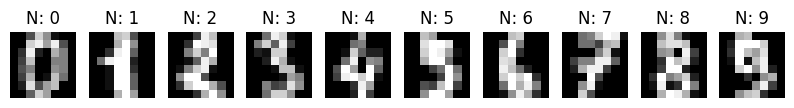

In [416]:
PrDg().show_digits(X, y)

In [417]:
prdg= PrDg(x=X, y=y, test_size=test_size, random_state=random_state, target_names=target_names, feature_names=feature_names)
y_pred, X_train, X_test, y_train, y_test = prdg.start(RandomForestClassifier())

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.94      0.97        34
           4       0.98      1.00      0.99        46
           5       0.94      0.96      0.95        47
           6       0.97      0.97      0.97        35
           7       0.97      0.97      0.97        34
           8       0.97      0.97      0.97        30
           9       0.95      0.95      0.95        40

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



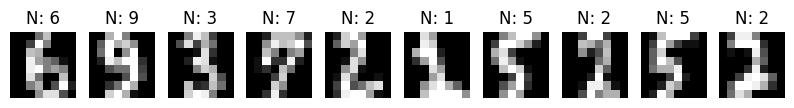

In [418]:
PrDg().show_digits(X_test, y_pred)

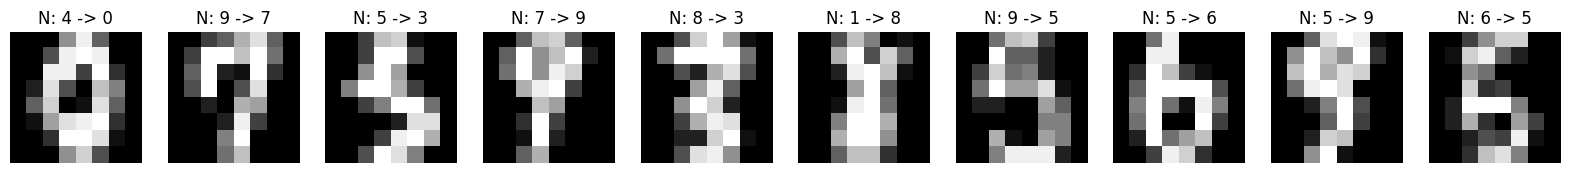

In [ ]:
# Stampo i le false predizioni
false_x, false_y= prdg.show_pred_false_test(figsize=(20, 5))